In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/train.csv')

In [3]:
data.shape

(8693, 14)

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

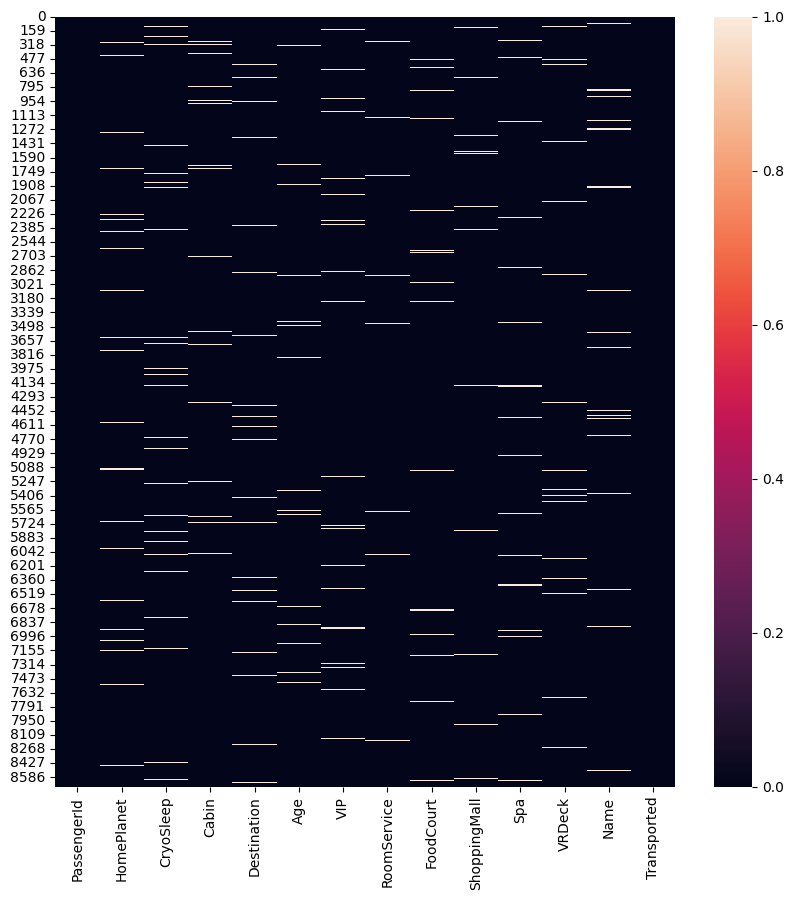

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())
plt.show()

In [9]:
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [10]:
missing_value_column = missing_value_percent[missing_value_percent > 17].keys()
print(missing_value_column)

Index([], dtype='object')


In [11]:
data.shape

(8693, 14)

In [12]:
data1 = data.dropna()

In [13]:
data1.shape

(6606, 14)

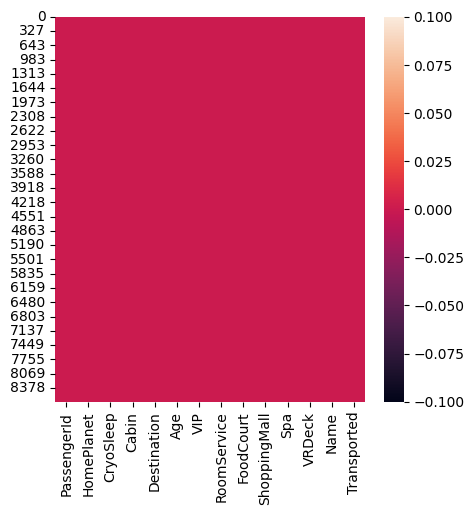

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(data1.isnull())
plt.show()

In [15]:
data1.isnull().sum().sum()

0

In [16]:
data1.select_dtypes(include=['int64','float64']).columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [17]:
num_var = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

<ipython-input-18-b476e054cfa5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var], bins=20)
<ipython-input-18-b476e054cfa5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[var], bins=20)
<ipython-input-18-b476e054cfa5>:8: UserWarning: 

`distplot` is a deprecated function and wil

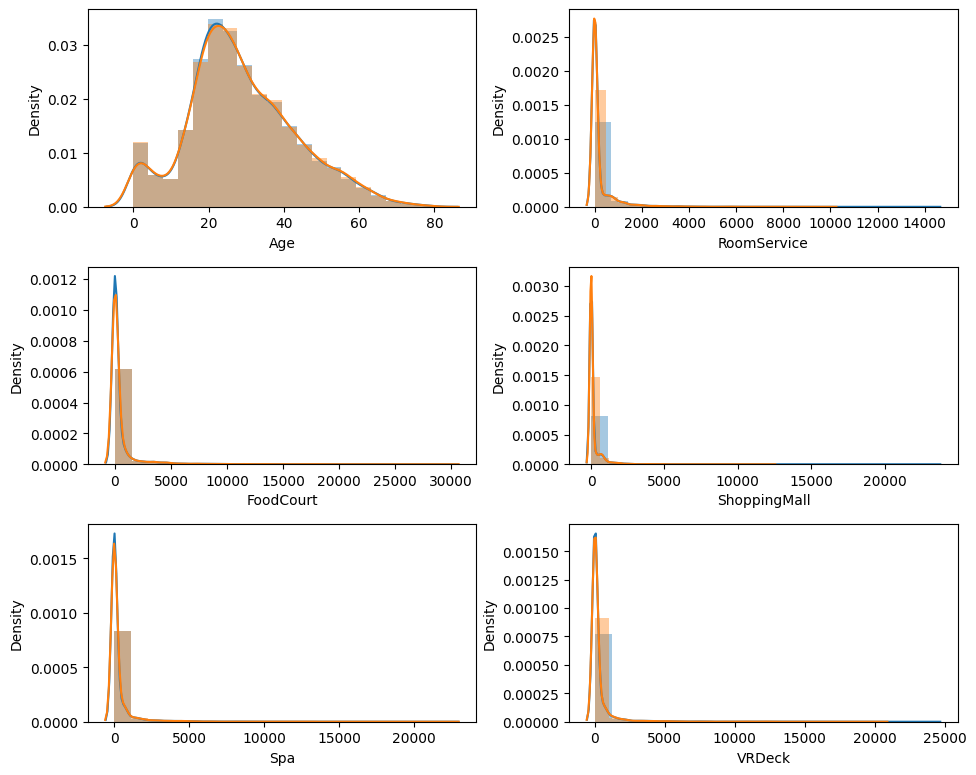

In [18]:
plt.figure(figsize=(10,10))
# Calculate the number of rows and columns for the subplots
num_rows = (len(num_var) + 3) // 2 # Adjust the number of columns as needed
num_cols = 2

for i, var in enumerate(num_var):
  plt.subplot(num_rows, num_cols, i+1)
  sns.distplot(data[var], bins=20)
  sns.distplot(data1[var], bins=20)
plt.tight_layout() # Optional: Adjusts the spacing between subplots
plt.show()

In [19]:
data1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [20]:
mean_age = data1['Age'].astype('int64').mean()

In [21]:
data1['Age'].replace(np.nan, mean_age, inplace=True)

<ipython-input-21-c2d40d0129ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Age'].replace(np.nan, mean_age, inplace=True)
<ipython-input-21-c2d40d0129ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age'].replace(np.nan, mean_age, inplace=True)


In [ ]:
data1[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = data1[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
data1.isnull().sum().sort_values(ascending=False)

<ipython-input-23-8380e6f22bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = data1[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)


,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [22]:
data1.select_dtypes(include=['object']).columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [23]:
data1.drop("PassengerId", axis=1, inplace=True)

<ipython-input-23-3df37caa99e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop("PassengerId", axis=1, inplace=True)


In [24]:
data1.drop("Name", axis=1, inplace=True)

<ipython-input-24-6d21646d27df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop("Name", axis=1, inplace=True)


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   object 
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 625.8+ KB


In [26]:
label = "Transported"
data1[label] = data1[label].astype(int)

<ipython-input-26-969ccf973226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[label] = data1[label].astype(int)


In [27]:
data1['VIP'] = data1['VIP'].astype(int)
data1['CryoSleep'] = data1['CryoSleep'].astype(int)

<ipython-input-27-fd2b2edcb962>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['VIP'] = data1['VIP'].astype(int)
<ipython-input-27-fd2b2edcb962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CryoSleep'] = data1['CryoSleep'].astype(int)


In [28]:
data1[["Deck", "Cabin_num", "Side"]] = data1["Cabin"].str.split("/", expand=True)

<ipython-input-28-daf7d9f77932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[["Deck", "Cabin_num", "Side"]] = data1["Cabin"].str.split("/", expand=True)
<ipython-input-28-daf7d9f77932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[["Deck", "Cabin_num", "Side"]] = data1["Cabin"].str.split("/", expand=True)
<ipython-input-28-daf7d9f77932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [29]:
try:
    data1 = data1.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [30]:
data1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [33]:
dummy_HP = pd.get_dummies(data1['HomePlanet'])
dummy_HP.rename(columns={'Earth':'HomePlanetType_Earth','Europa':'HomePlanetType_Europa','Mars':'HomePlanetType_Mars'}, inplace=True)
data1 = pd.concat([data1, dummy_HP], axis=1)
data1.drop("HomePlanet", axis=1, inplace=True)
data1.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,HomePlanetType_Earth,HomePlanetType_Europa,HomePlanetType_Mars
0,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,False,True,False
1,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,True,False,False
2,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,False,True,False
3,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,False,True,False
4,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,True,False,False


In [35]:
data1['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,4576
55 Cancri e,1407
PSO J318.5-22,623


In [36]:
dummy_DE = pd.get_dummies(data1['Destination'])
dummy_DE.rename(columns={'TRAPPIST-1e':'DestinationType_TRAPPIST-1e','55 Cancri e':'DestinationType_55_Cancri_e','PSO J318.5-22':'DestinationType_PSO_J318.5-22'}, inplace=True)
data1 = pd.concat([data1, dummy_DE], axis=1)
data1.drop("Destination", axis=1, inplace=True)
data1.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,HomePlanetType_Earth,HomePlanetType_Europa,HomePlanetType_Mars,DestinationType_55_Cancri_e,DestinationType_PSO_J318.5-22,DestinationType_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,False,True,False,False,False,True
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,True,False,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,False,True,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,False,True,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,True,False,False,False,False,True


In [37]:
data1['Deck'].value_counts()

,count
Deck,
F,2152
G,1973
E,683
B,628
C,587
D,374
A,207
T,2


In [38]:
dummy_DC = pd.get_dummies(data1['Deck'])
dummy_DC.rename(columns={'A':'DeckA','B':'DeckB','C':'DeckC','D':'DeckD','E':'DeckE','F':'DeckF','G':'DeckG','T':'DeckT'}, inplace=True)
data1 = pd.concat([data1, dummy_DC], axis=1)
data1.drop("Deck", axis=1, inplace=True)
data1.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,DestinationType_PSO_J318.5-22,DestinationType_TRAPPIST-1e,DeckA,DeckB,DeckC,DeckD,DeckE,DeckF,DeckG,DeckT
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,False,True,False,True,False,False,False,False,False,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,False,True,False,False,False,False,False,True,False,False
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,False,True,True,False,False,False,False,False,False,False
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,False,True,True,False,False,False,False,False,False,False
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,False,True,False,False,False,False,False,True,False,False


In [39]:
data1['Side'].value_counts()

,count
Side,
S,3345
P,3261


In [40]:
dummy_SI = pd.get_dummies(data1['Side'])
dummy_SI.rename(columns={'S':'SideS','P':'SideP'}, inplace=True)
data1 = pd.concat([data1, dummy_SI], axis=1)
data1.drop("Side", axis=1, inplace=True)
data1.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,DeckA,DeckB,DeckC,DeckD,DeckE,DeckF,DeckG,DeckT,SideP,SideS
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,False,False,False,False,False,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,True,False,False,False,False,False,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,True,False,False,False,False,False,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,False,False,False,False,False,True,False,False,False,True


In [41]:
data1.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Cabin_num', 'HomePlanetType_Earth',
       'HomePlanetType_Europa', 'HomePlanetType_Mars',
       'DestinationType_55_Cancri_e', 'DestinationType_PSO_J318.5-22',
       'DestinationType_TRAPPIST-1e', 'DeckA', 'DeckB', 'DeckC', 'DeckD',
       'DeckE', 'DeckF', 'DeckG', 'DeckT', 'SideP', 'SideS'],
      dtype='object')

In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CryoSleep                      6606 non-null   int64  
 1   Age                            6606 non-null   float64
 2   VIP                            6606 non-null   int64  
 3   RoomService                    6606 non-null   float64
 4   FoodCourt                      6606 non-null   float64
 5   ShoppingMall                   6606 non-null   float64
 6   Spa                            6606 non-null   float64
 7   VRDeck                         6606 non-null   float64
 8   Transported                    6606 non-null   int64  
 9   Cabin_num                      6606 non-null   object 
 10  HomePlanetType_Earth           6606 non-null   bool   
 11  HomePlanetType_Europa          6606 non-null   bool   
 12  HomePlanetType_Mars            6606 non-null   bool  

In [44]:
data1['Cabin_num'] = data1['Cabin_num'].astype("int64")

In [51]:
data1['HomePlanetType_Earth'] = data1['HomePlanetType_Earth'].astype("int64")
data1['HomePlanetType_Europa'] = data1['HomePlanetType_Europa'].astype("int64")
data1['HomePlanetType_Mars'] = data1['HomePlanetType_Mars'].astype("int64")

In [52]:
data1['DestinationType_55_Cancri_e'] = data1['DestinationType_55_Cancri_e'].astype("int64")
data1['DestinationType_PSO_J318.5-22'] = data1['DestinationType_PSO_J318.5-22'].astype("int64")
data1['DestinationType_TRAPPIST-1e'] = data1['DestinationType_TRAPPIST-1e'].astype("int64")

In [53]:
data1['DeckA'] = data1['DeckA'].astype("int64")
data1['DeckB'] = data1['DeckB'].astype("int64")
data1['DeckC'] = data1['DeckC'].astype("int64")
data1['DeckD'] = data1['DeckD'].astype("int64")
data1['DeckE'] = data1['DeckE'].astype("int64")
data1['DeckF'] = data1['DeckF'].astype("int64")
data1['DeckG'] = data1['DeckG'].astype("int64")
data1['DeckT'] = data1['DeckT'].astype("int64")

In [54]:
data1['SideP'] = data1['SideP'].astype("int64")
data1['SideS'] = data1['SideS'].astype("int64")

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CryoSleep                      6606 non-null   int64  
 1   Age                            6606 non-null   float64
 2   VIP                            6606 non-null   int64  
 3   RoomService                    6606 non-null   float64
 4   FoodCourt                      6606 non-null   float64
 5   ShoppingMall                   6606 non-null   float64
 6   Spa                            6606 non-null   float64
 7   VRDeck                         6606 non-null   float64
 8   Transported                    6606 non-null   int64  
 9   Cabin_num                      6606 non-null   int64  
 10  HomePlanetType_Earth           6606 non-null   int64  
 11  HomePlanetType_Europa          6606 non-null   int64  
 12  HomePlanetType_Mars            6606 non-null   int64 

In [56]:
!pip install lazypredict

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [59]:
features = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck', 'Cabin_num', 'HomePlanetType_Earth','HomePlanetType_Europa', 'HomePlanetType_Mars','DestinationType_55_Cancri_e', 'DestinationType_PSO_J318.5-22','DestinationType_TRAPPIST-1e', 'DeckA', 'DeckB', 'DeckC', 'DeckD','DeckE', 'DeckF', 'DeckG', 'DeckT', 'SideP', 'SideS']

In [78]:
target = data1['Transported'].astype("int64")

In [84]:
data1['Transported'].value_counts()

,count
Transported,
1,3327
0,3279


In [85]:
import numpy as np

In [90]:
X = data1[features]
y = np.asarray(data1['Transported'])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (5284, 25) Y_train.shape= (5284,)
X_test.shape= (1322, 25) Y_test.shape= (1322,)


In [93]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print("Models performance:")
models

 97%|█████████▋| 30/31 [00:12<00:00,  2.67it/s]

[LightGBM] [Info] Number of positive: 2658, number of negative: 2626
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1660
[LightGBM] [Info] Number of data points in the train set: 5284, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503028 -> initscore=0.012112
[LightGBM] [Info] Start training from score 0.012112


100%|██████████| 31/31 [00:13<00:00,  2.36it/s]

Models performance:


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.82,0.82,0.82,0.82,0.56
LGBMClassifier,0.82,0.82,0.82,0.82,0.35
SVC,0.82,0.82,0.82,0.82,1.35
ExtraTreesClassifier,0.82,0.82,0.82,0.82,0.88
RandomForestClassifier,0.81,0.82,0.82,0.81,0.93
NuSVC,0.81,0.81,0.81,0.81,1.85
BaggingClassifier,0.80,0.80,0.80,0.80,0.44
AdaBoostClassifier,0.80,0.80,0.80,0.80,0.55
LinearSVC,0.79,0.79,0.79,0.79,0.09


In [94]:
import xgboost as xgb
from xgboost import XGBClassifier

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (5284, 25) Y_train.shape= (5284,)
X_test.shape= (1322, 25) Y_test.shape= (1322,)


In [97]:
num_classes = len(np.unique(y))

In [116]:
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective='multi:softmax', num_class=num_classes)

In [117]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [118]:
y_pred = model.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score

In [108]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [115]:
print(y_pred)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [109]:
print(y_test.shape)  # Should be (n_samples,)
print(y_pred.shape)  # Should be (n_samples,)

(1322,)
(1322, 2)


In [111]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       653
           1       0.79      0.85      0.82       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



In [128]:
data_test = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv')

In [129]:
data_test.shape

(4277, 13)

In [130]:
data_test.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98
